# Multinomial Logistic Regression using Softmax function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_graph(X,y):
    # plot points
    plt.figure(figsize=(12,6))
    plt.tight_layout()
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.xlim(-11,10)
    plt.ylim(-11,11)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
    plt.show()
        
def show_error(cost):
    plt.figure(figsize=(12, 6))
    plt.tight_layout()
    plt.title("Cross-entropy loss:")
    plt.xlabel("iterations")
    plt.ylabel("loss")
    plt.plot(np.arange(iterations), cost)
    plt.show()
    
def show_classes(W):
    plt.figure(figsize=(12,6))
    plt.tight_layout()
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.xlim(-11,10)
    plt.ylim(-11,11)
    
    x_all = np.array(np.meshgrid(np.arange(-11,11,0.1), np.arange(-11,11,0.1))).reshape(2,-1)
    y_all = softmax(x_all.T @ W)
    color_all = np.argmax(y_all,axis=1)

    plt.scatter(x_all[0], x_all[1], marker='D', alpha=np.max(y_all,axis=1)/3, c=color_all, s=7, cmap='gist_rainbow')
    plt.show()

## Creating a random non-linearly separable training set 

- Our training set consist in N radom points in $(x_1,x_2) \in [-10, 10] \times [-10, 10] \subseteq R^2$ region

- Let us fix a function $f_1(x) = a - e^{\normalsize x - a}$ and $f_2(x) = \frac{a}{2} sin(x), \; a \in R $

- let's decide which class each point belongs to using $f_1(x)$ and $f_2(x)$: </br > 
  - if $f_1(x_2) \, < \, x_1$ and $f_2(x_1) \, < \,x_2$ it belongs to  <font color="ff0029">RED</font> class
  - if $f_1(x_2) \, > \, x_1$ and $f_2(x_1) \, < \,x_2$ it belongs to <font color="#008fff">BLUE</font> class
  - if $f_1(x_2) \, < \,x_1$ and $f_2(x_1) \, < \,x_2$ it belongs to <font color="5cff00">GREEN</font> class
  - if $f_1(x_2) \, > \,x_1$ and $f_2(x_1) \, > \,x_2$ it belongs to <font color="ff00bf">PINK</font> class

In [3]:
N = 150

# creating a random data
x1 = np.random.randint(-10,10,N)
x2 = np.random.randint(-10,10,N)

X = np.concatenate(([x1],[x2]), axis=0)
X = np.transpose(X)


# assign colors
a = 3
y = np.full(N, 2)
y[np.where(a/2*np.sin(x1) > x2)] += 1
y[np.where(a-np.exp(x2-a) > x1)] += 1
y[np.where(a-np.exp(x2-a) < x1)] -= 1

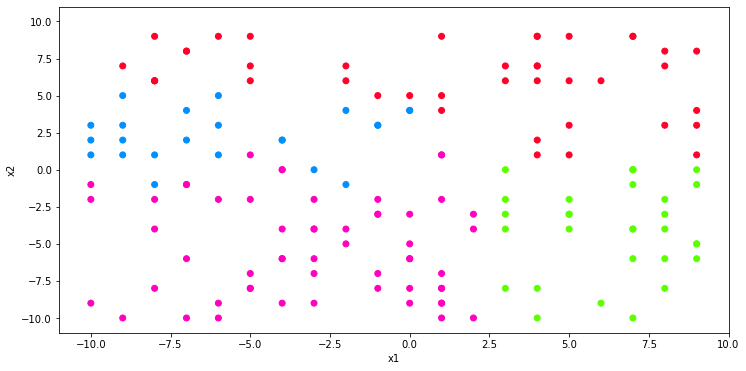

In [4]:
show_graph(X, y)

## Hypotesis

We want an approach that estimates the K conditionals $P(y=j|x), j = 1, 2,..., K$
To do this we will use a generalization of the <ins>Logistic regression</ins> for the case of multiple classes and called **Multinomial Logistic Regression** using **softmax** function

$\normalsize \hat{p}_{ij} = \hat{P}(y=j|x_i) = \dfrac{e^{w_j^{T}x_i}}{\sum_{k = 1}^{K}e^{w_k^{T}x_i}}, \normalsize \;\;j = 1,2,...,K, \;\; i = 1,2,...,N$

$\normalsize \phi(z)_j =  \dfrac{e^{z_j}}{\sum_{i = 1}^{K}e^{z_i}}$ is the $\,softmax\,$ function

## Formulation

To use softmax regression we need to treat the data in a different way
- $N$ = trainset size (150)
- $D$ = dimentions / features (2)
- $K$ = classes (4)

$\normalsize X = \begin{bmatrix} x_{11} & x_{12} & ... & x_{1D} \\ x_{21} & x_{22} & ... & x_{2D} \\ \vdots \\ x_{N1} & x_{N2} & ... & x_{ND} \end{bmatrix} , 
\quad\quad \hat{Y} =  \begin{bmatrix} \hat{p}_{11} & \hat{p}_{12} & ... & \hat{p}_{1K} \\ \hat{p}_{21} & \hat{p}_{22} & ... & \hat{p}_{2K} \\ \vdots \\ \hat{p}_{N1} & \hat{p}_{N2} & ... & \hat{p}_{NK} \end{bmatrix}, 
\quad\quad W = \begin{bmatrix} w_{11} & w_{12} & ... & w_{1K} \\ w_{21} & w_{22} & ... & w_{2K} \\ \vdots \\ w_{D1} & w_{D2} & ... & w_{DK} \end{bmatrix} \; = \;
\begin{bmatrix} \text{---} & w_1^{T} & \text{---} \\ \text{---} & w_2^{T} & \text{---} \\ & \vdots \\ \text{---} & w_K^{T} & \text{---} \end{bmatrix}$

</br >

- <ins>One-hot encoding</ins> of the output:

$\quad \;\; ex.: \; \normalsize y = \big[\mathbf{1,3,4,2}\big] \implies Y = \normalsize \begin{bmatrix} \mathbf{1} & 0 & 0 & 0 \\ 0 & 0 & \mathbf{1} & 0 \\ 0 & 0 & 0 & \mathbf{1} \\ 0 & \mathbf{1} & 0 & 0 \end{bmatrix}$

</br >


In [5]:
# Y one hot encoding
Y = np.zeros((N, 4))
Y[np.arange(N), y-1] = 1

In [6]:
def softmax(z):
    Z = np.exp(z).T
    return (Z / np.sum(Z, axis=0)).T

### Maximum likelihood estimation

Let's find a $w$ that maximizes the likelihood of observing the examples. 

Assuming examples are $i.i.d.$ (independent and identically distributed), the likelihood function can be written as:

$\large \prod_{k = 1}^{K} \normalsize \hat{P}(y=k|x) \; = \;
\large \prod_{n = 1}^{N}  \prod_{k = 1}^{K} \normalsize \hat{P}(y=k|x_n) \; = \;
\large \prod_{n = 1}^{N} \prod_{k = 1}^{K} \normalsize \Bigg(\dfrac{e^{w_k^{T}x_n}}{\sum_{i=1}^{K}e^{w_i^{T}x_n}}\Bigg)^{\large y_{nk}}$

### Optimization problem
find $w$ that <ins>maximizes</ins> 
$\large \prod_{n = 1}^{N} \prod_{k = 1}^{K} \normalsize \Bigg(\dfrac{e^{w_k^{T}x_n}}{\sum_{i=1}^{K}e^{w_i^{T}x_n}}\Bigg)^{\large y_{nk}}$



Or, equivalently, <ins>minimizes</ins>

$ \begin{split}
\normalsize E_{in}(w) & = \normalsize -\dfrac{1}{N} \large \ln \Bigg[ \prod_{n = 1}^{N} \prod_{k = 1}^{K} \normalsize \Bigg(\dfrac{e^{w_k^{T}x_n}}{\sum_{i=1}^{K}e^{w_i^{T}x_n}}\Bigg)^{\large y_{nk}} \Bigg]\\ & = 
\normalsize -\dfrac{1}{N} \large \sum_{n = 1}^{N} \sum_{k = 1}^{K} \normalsize \ln \Bigg(\dfrac{e^{w_k^{T}x_n}}{\sum_{i=1}^{K}e^{w_i^{T}x_n}}\Bigg)^{\large y_{nk}} \\ & = 
\normalsize -\dfrac{1}{N} \large \sum_{n = 1}^{N} \sum_{k = 1}^{K} \normalsize y_{nk} \ln \Bigg(\dfrac{e^{w_k^{T}x_n}}{\sum_{i=1}^{K}e^{w_i^{T}x_n}}\Bigg)\\ & = 
\normalsize -\dfrac{1}{N} \large \sum_{n = 1}^{N} \sum_{k = 1}^{K} \normalsize y_{nk} \ln \hat{p}_{nk}
\end{split}$


where $\normalsize \hat{p}_{ij} = \dfrac{e^{w_j^{T}x_{i}}}{\sum_{k = 1}^{K}e^{w_k^{T}x_{i}}}, \;\;i = 1,2,...,N, \;\;j = 1,2,...,K \; $ and $\; \normalsize \sum_{j = 1}^{K} \hat{p}_{ij} = 1$

</br >

In [7]:
def cross_entropy_loss(X, Y, W):
    y_hat = softmax(X @ W)
    error = Y * np.log(y_hat)
    
    return -1/N * np.sum(error)

### Gradient Descent
$\normalsize \nabla E_{in}(w) = \begin{bmatrix} \text{---} & \dfrac{\partial E_{in}}{\partial w_1}^{T} & \text{---} \\ \text{---} & \dfrac{\partial E_{in}}{\partial w_2}^{T} & \text{---} \\ & \vdots \\ \text{---} & \dfrac{\partial E_{in}}{\partial w_K}^{T} & \text{---} \end{bmatrix}$

</br >

$ \begin{split} 
\normalsize \dfrac{\partial E_{in}}{\partial w_{j}} & = 
\normalsize \dfrac{\partial}{\partial w_j} \normalsize \Bigg[ -\dfrac{1}{N} \large \sum_{n = 1}^{N} \sum_{k = 1}^{K} \normalsize y_{nk} \ln \Bigg(\dfrac{e^{w_j^{T}x_n}}{\sum_{i=1}^{K}e^{w_i^{T}x_n}}\Bigg) \Bigg]\\ & = 
\normalsize -\dfrac{1}{N} \dfrac{\partial}{\partial w_j} \normalsize \Bigg[ \large \sum_{n = 1}^{N} \sum_{k = 1}^{K} \normalsize y_{nk} w_j^{T}x_n - \sum_{n = 1}^{N} \sum_{k = 1}^{K} \normalsize y_{nk} \ln \Big( \sum_{i=1}^{K}e^{w_i^{T}x_n} \Big) \Bigg]\\ & = 
\normalsize -\dfrac{1}{N} \normalsize \Bigg[ \large \sum_{n = 1}^{N}  \normalsize y_{nj} x_n - \large \sum_{n = 1}^{N} \normalsize \Big( \dfrac{1}{\sum_{i=1}^{K}e^{w_i^{T}x_n}} e^{w_j^{T}x_n} x_n\Big) \Bigg]\\ & = 
\normalsize \dfrac{1}{N} \normalsize \Bigg[ \large \sum_{n = 1}^{N}  \normalsize -(y_{nj} x_n) + \normalsize \Big( \dfrac{e^{w_j^{T}x_n}}{\sum_{i=1}^{K}e^{w_i^{T}x_n}} x_n\Big) \Bigg]\\ & = 
\normalsize \dfrac{1}{N} \normalsize \Bigg[ \large \sum_{n = 1}^{N}  \normalsize (\hat{p}_{nj} -y_{nj}) x_n \Bigg]
\end{split} $

</br >


## Labeling

$\normalsize Label(X) = argmax\big(\phi(w_{final}X)\big)$

In [8]:
alpha = 0.001 # learning rate
iterations = 5000 # epochs
W = np.random.rand(2, 4) # small random values

In [9]:
def softmax_regression(X, y, w, alpha, iterations):
    cost = np.zeros(iterations)

    for it in range (iterations):
        y_hat = softmax(X @ w)

        delta_w = 1/N * (y_hat - y).T @ X

        w = w - alpha * delta_w.T
        cost[it] = cross_entropy_loss(X, y, w)
        
    return w, cost

In [10]:
W, cost = softmax_regression(X, Y, W, alpha, iterations)

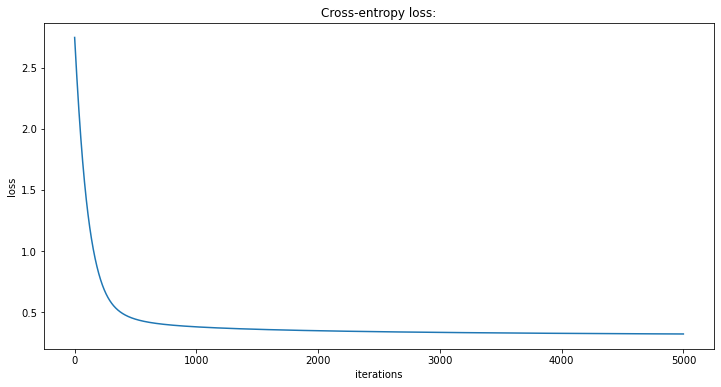

In [11]:
show_error(cost)

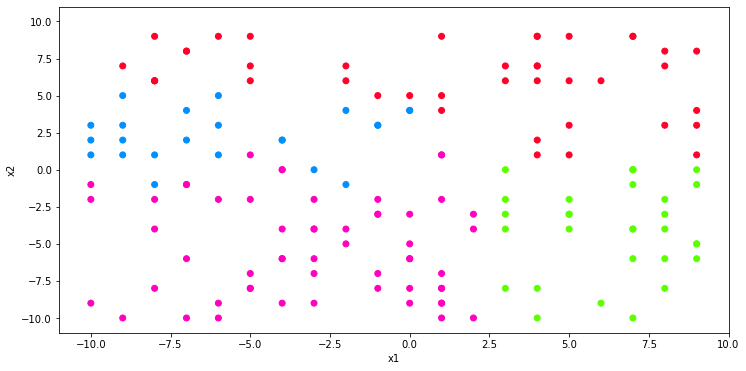

In [12]:
show_graph(X,y)

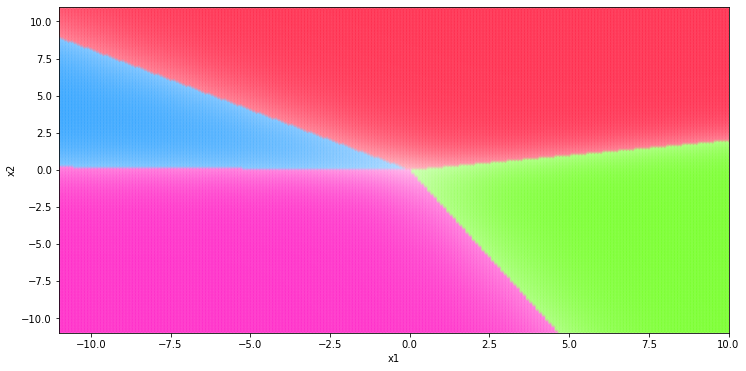

In [13]:
show_classes(W)

## References

 - Abu-Mostafa, Yaser S., Magdon-Ismail, Malik and Lin, Hsuan-Tien. Learning From Data. : AMLBook, 2012.
 - https://work.caltech.edu/telecourse (lecture 9)
 - https://towardsdatascience.com/multiclass-logistic-regression-from-scratch-9cc0007da372
 - https://www.kamperh.com/data414/